# Principal Component Analysis

PCA is an eigenvector-based multivariate analysis, it is often used as a method to reveal the internal structure of the data in a way that best explains its variance. The following are some objectives of the PCA technique:

- dimensionality reduction; 
- determination of linear combinations of variables;
- selection of characteristics or features: the choice of the most useful variables;
- visualization of multidimensional data;
- identification of underlying variables;
- identification of groups of objects or outliers.

PCA can be obtained through:
- eigenvalue decomposition of a data covariance matrix;
- singular value decomposition of a data matrix, usually after mean centering and normalizing the data matrix for each attribute.

PCA results are usually discussed in terms of component scores, sometimes called factor scores (the transformed variable values corresponding to a particular data point), and loadings (the weight by which each standardized original variable should be multiplied to get the component score).

(source: https://www.apsl.net/blog/2017/06/21/using-principal-component-analysis-pac-data-explore-step-step/)

In [1]:
!pip install yellowbrick

In [2]:
from __future__ import print_function, division
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
feature_names = iris.feature_names
features = iris.data
y = iris.target

In [4]:
# data standardisation
# you could directly use sklearn.preprocessing.StandardScaler
features_mean = np.mean(features,axis=0)
features_var = np.var(features,axis=0)
X = (features - features_mean)/np.sqrt(features_var)

In [5]:
# dimensionality reduction
np.random.seed(5)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

Text(0.5,0,u'PC3')

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


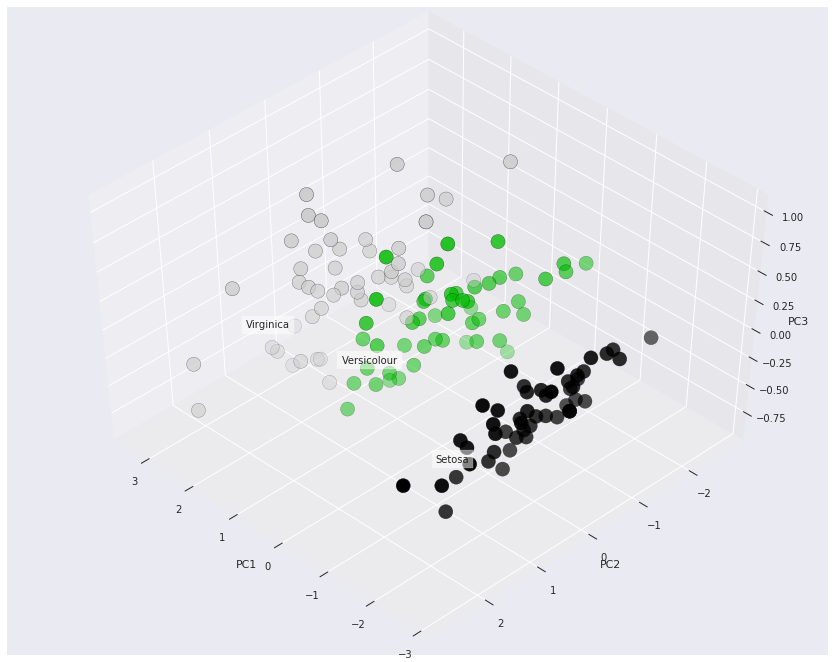

In [6]:
fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[y == label, 0].mean(),
              X_pca[y == label, 1].mean() + 1.5,
              X_pca[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
#y_c = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
           c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k', s=200)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


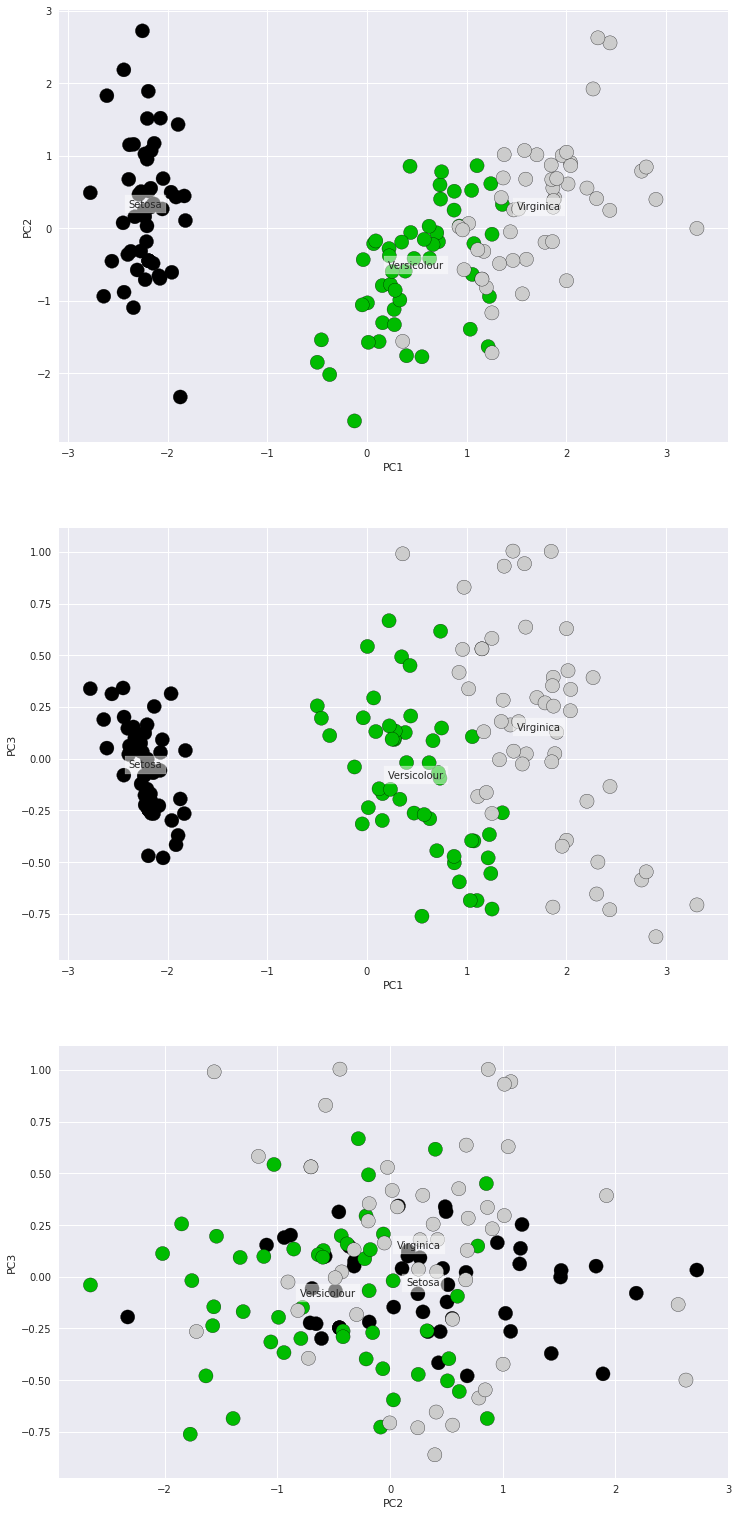

In [8]:
pc_combinations = ((0,1),(0,2),(1,2))
pc_names = ['PC' + str(ii+1) for ii in range(3)]
figure, ax = plt.subplots(len(pc_combinations),1, figsize=(12, 9*len(pc_combinations)))

for this_ax, this_pcs in zip(ax, pc_combinations):
  this_ax.scatter(X_pca[:, this_pcs[0]],X_pca[:, this_pcs[1]], c=y,
                    cmap=plt.cm.nipy_spectral,
                    edgecolor='k', s=200)
  for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    this_ax.text(X_pca[y == label, this_pcs[0]].mean(),
                 X_pca[y == label, this_pcs[1]].mean(),
                 name, horizontalalignment='center',
                 bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
  
  this_ax.set_xlabel(pc_names[this_pcs[0]])
  this_ax.set_ylabel(pc_names[this_pcs[1]])